### INTRODUCTION

In this notebook, I have studied the current cases of COVID-19 in India and mapped them with respective number of Confirmed Cases and number of Recovered Cases for each state of India. To do that, I have used a Python visualization library, namely Folium. The main point behind using Folium is that it was developed for the sole purpose of visualizing geospatial data. While other libraries are available to visualize geospatial data, such as plotly, they might have a cap on how many API calls we can make within a defined time frame. Folium, on the other hand, is completely free.

### Exploring Datasets with pandas

For this particular problem I have used the CSV file State_Data as the dataset. This file contains total of 8 columns namely 'Name of State / UT', 'Total Confirmed Cases', 'Cured/Discharged/Migrated', 'Death', 'Date', 'Latitude', 'Longitude' and 'Total Cases'. Each row represents a state or Union Territory of India. For this problem, however we will be using onlythree columns namely 'Name of State / UT', 'Latitude' and 'Longitude'. As, for COVID-19 cases we will be scapping the Google News website to get latest data everytime we run this notebook.

In [1]:
# Importing the NumPy and the Pandas Library.
import numpy as np
import pandas as pd

In [2]:
# The location of the file on the Device (or on the server). 
# After that we are storing the data from the csv file into the variable 'data'.
location = '/home/prashantpk/Desktop/PK/India COVID19/State_Data.csv'
data = pd.read_csv(location)

In [3]:
data.head()

,Name of State / UT,Total Confirmed cases (Including 76 foreign Nationals),Cured/Discharged/Migrated,Death,Date,Latitude,Longitude,Total cases
0,Andaman and Nicobar Islands,11,10,0,2020-04-15,11.7401,92.6586,11
1,Andhra Pradesh,503,16,9,2020-04-15,15.9129,79.7400,503
2,Arunachal Pradesh,1,0,0,2020-04-15,28.2180,94.7278,1
3,Assam,33,0,1,2020-04-15,26.2006,92.9376,33
4,Bihar,70,29,1,2020-04-15,25.0961,85.3131,70


In [4]:
# Now, I have reduced the columns of the data, so as to contain only necessary information that I require.
df = data[['Name of State / UT', 'Latitude', 'Longitude']]

In [5]:
df.head()

,Name of State / UT,Latitude,Longitude
0,Andaman and Nicobar Islands,11.7401,92.6586
1,Andhra Pradesh,15.9129,79.7400
2,Arunachal Pradesh,28.2180,94.7278
3,Assam,26.2006,92.9376
4,Bihar,25.0961,85.3131


In [6]:
# Setting the name of the State or Union Territory as the index of the Dataframe.
df.set_index(['Name of State / UT'], inplace = True)

In [7]:
df.head()

,Latitude,Longitude
Name of State / UT,,
Andaman and Nicobar Islands,11.7401,92.6586
Andhra Pradesh,15.9129,79.7400
Arunachal Pradesh,28.2180,94.7278
Assam,26.2006,92.9376
Bihar,25.0961,85.3131


### Using Folium

Folium is a powerful Python library that helps us to create several types of Leaflet maps. The fact that the Folium results are interactive makes this library is very useful for dashboard building.

In [8]:
#!conda install -c conda-forge folium=0.5.0 --yes
import folium
print('Folium successfully imported!')

Folium successfully imported!


Generating the world map is straigtforward in Folium. We simply create a Folium Map object with parameters 'location', 'zoom_start' or any other and then display it. What is attactive about Folium maps is that they are interactive, so we can very easily zoom into any region of interest despite the initial zoom level.

In [9]:
# Defining the world map centred around India
# Coordinates of India: 20.5937° N, 78.9629° E
india_map = folium.Map(location = [20.5937, 78.9629], zoom_start = 4)

In [10]:
india_map

### Scraping the data from Google News page about COVID-19 cases and transforming it to Pandas Dataframe

In [11]:
import requests
import urllib.request
import time
from bs4 import BeautifulSoup

Getting the URL of the page and creating a request using requests.get() to get the data from the page.

In [12]:
url = 'https://news.google.com/covid19/map?hl=en-IN&gl=IN&ceid=IN%3Aen&mid=%2Fm%2F03rk0'
response = requests.get(url)

In [13]:
response  # Here in the output [200] means that it went through

<Response [200]>

Scraping the Google News Page content with the help of BeautifulSoup

In [14]:
soup_data = BeautifulSoup(response.text, "html.parser")

Now we will clean the Data so as to get desired data only. After that we will convert the content of the Google News page into a table.

In [15]:
web_data = []
for tr in soup_data.tbody.find_all('tr'):
    web_data.append([ td.get_text().strip() for td in tr.find_all('td')])

In [16]:
web_data

[['34,24,254', '440', '10,92,715', '2,43,674'],
 ['39,980', '29', '10,633', '1,301'],
 ['11,506', '101', '—', '485'],
 ['4,721', '75', '—', '236'],
 ['3,738', '197', '—', '61'],
 ['2,719', '37', '—', '145'],
 ['2,666', '39', '—', '62'],
 ['2,526', '37', '—', '28'],
 ['2,455', '12', '—', '43'],
 ['1,525', '31', '—', '33'],
 ['1,057', '30', '—', '26'],
 ['795', '9', '—', '33'],
 ['772', '28', '—', '20'],
 ['639', '51', '—', '8'],
 ['598', '9', '—', '25'],
 ['498', '14', '—', '4'],
 ['471', '5', '—', '3'],
 ['360', '14', '—', '4'],
 ['154', '3', '—', '1'],
 ['112', '4', '—', '3'],
 ['88', '—', '—', '—'],
 ['58', '6', '—', '—'],
 ['43', '1', '—', '1'],
 ['43', '2', '—', '—'],
 ['40', '6', '—', '1'],
 ['33', '87', '—', '—'],
 ['22', '80', '—', '—'],
 ['12', '5', '—', '1'],
 ['8', '6', '—', '—'],
 ['7', '4', '—', '—'],
 ['2', '1', '—', '—'],
 ['2', '1', '—', '—'],
 ['1', '1', '—', '—'],
 ['1', '0', '—', '—'],
 ['1', '1', '—', '—']]

Now, we will create the dataframe of the 'web_data' table that conrains our data values. But, since web_data doesn't contains any column with the State or UT name, so we need to get that column from the web scrapped data.

In [17]:
cases_df = pd.DataFrame(web_data, columns = ['Confirmed_Cases', 'Cases_per_1_Million_People', 'Recovered_Cases', 'Deaths'])

In [18]:
cases_df.drop(['Recovered_Cases'], axis = 1, inplace = True)
cases_df.head()

,Confirmed_Cases,Cases_per_1_Million_People,Deaths
0,"34,24,254",440,"2,43,674"
1,"39,980",29,"1,301"
2,"11,506",101,485
3,"4,721",75,236
4,"3,738",197,61


Here,  I have cleaned the data so as to get the state name from the scrapped data that I have obtained from the Google News Page.

In [19]:
state_name = []
for th in soup_data.tbody.find_all('th'):
    state_name.append([ th.get_text().strip() for span in th.find_all('span')])

In [20]:
state_name

[['Worldwide'],
 ['India'],
 ['Maharashtra'],
 ['Gujarat'],
 ['Delhi'],
 ['Madhya Pradesh'],
 ['Rajasthan'],
 ['Tamil Nadu'],
 ['Uttar Pradesh'],
 ['Andhra Pradesh'],
 ['Telangana'],
 ['West Bengal'],
 ['Punjab'],
 ['Jammu and Kashmir'],
 ['Karnataka'],
 ['Kerala'],
 ['Bihar'],
 ['Haryana'],
 ['Odisha'],
 ['Jharkhand'],
 ['Chandigarh'],
 ['Uttarakhand'],
 ['Assam'],
 ['Chhattisgarh'],
 ['Himachal Pradesh'],
 ['Andaman and Nicobar Islands'],
 ['Ladakh'],
 ['Meghalaya'],
 ['Puducherry'],
 ['Goa'],
 ['Tripura'],
 ['Manipur'],
 ['Arunachal Pradesh'],
 ['Nagaland'],
 ['Mizoram']]

After that I have created a Dataframe for the States data.

In [21]:
state_df = pd.DataFrame(state_name, columns = ['Location'])
state_df

,Location
0,Worldwide
1,India
2,Maharashtra
3,Gujarat
4,Delhi
5,Madhya Pradesh
6,Rajasthan
7,Tamil Nadu
8,Uttar Pradesh
9,Andhra Pradesh


After that I have merged both the DataFrames suing their indexes to get the DataFrame that contains the Location (State or UT name) and other dat as required.

In [22]:
state_cases_df = state_df.merge(cases_df, left_index=True, right_index=True)

In [23]:
state_cases_df

,Location,Confirmed_Cases,Cases_per_1_Million_People,Deaths
0,Worldwide,"34,24,254",440,"2,43,674"
1,India,"39,980",29,"1,301"
2,Maharashtra,"11,506",101,485
3,Gujarat,"4,721",75,236
4,Delhi,"3,738",197,61
5,Madhya Pradesh,"2,719",37,145
6,Rajasthan,"2,666",39,62
7,Tamil Nadu,"2,526",37,28
8,Uttar Pradesh,"2,455",12,43
9,Andhra Pradesh,"1,525",31,33


In [24]:
state_cases_df.set_index(['Location'], inplace = True)

After that I have merged the States dataFrame that contains the States Name, Latitude and Longitude of all the states of India with the previously merged DatafRame that contains the number of cases with respect to the States or UT names. This is the final DataFrame that I have used in the notebook.

In [25]:
final_df = df.merge(state_cases_df, left_index=True, right_index=True)

In [26]:
final_df.head()

,Latitude,Longitude,Confirmed_Cases,Cases_per_1_Million_People,Deaths
Andaman and Nicobar Islands,11.7401,92.6586,33,87,—
Andhra Pradesh,15.9129,79.7400,"1,525",31,33
Arunachal Pradesh,28.2180,94.7278,1,1,—
Assam,26.2006,92.9376,43,1,1
Bihar,25.0961,85.3131,471,5,3


In [27]:
final_df.reset_index(inplace = True)

In [28]:
final_df.rename(columns = {'index' : 'Location'}, inplace = True)

In [30]:
folium_df = final_df[['Location', 'Latitude', 'Longitude', 'Confirmed_Cases', 'Deaths']]

In [31]:
final_df.head()

,Location,Latitude,Longitude,Confirmed_Cases,Cases_per_1_Million_People,Deaths
0,Andaman and Nicobar Islands,11.7401,92.6586,33,87,—
1,Andhra Pradesh,15.9129,79.7400,"1,525",31,33
2,Arunachal Pradesh,28.2180,94.7278,1,1,—
3,Assam,26.2006,92.9376,43,1,1
4,Bihar,25.0961,85.3131,471,5,3


In [32]:
folium_df.head()

,Location,Latitude,Longitude,Confirmed_Cases,Deaths
0,Andaman and Nicobar Islands,11.7401,92.6586,33,—
1,Andhra Pradesh,15.9129,79.7400,"1,525",33
2,Arunachal Pradesh,28.2180,94.7278,1,—
3,Assam,26.2006,92.9376,43,1
4,Bihar,25.0961,85.3131,471,3


In [33]:
final_df['Confirmed_Cases'] = final_df['Confirmed_Cases'].str.replace(',', '')
final_df['Cases_per_1_Million_People'] = final_df['Cases_per_1_Million_People'].str.replace(',', '')
final_df['Deaths'] = final_df['Deaths'].str.replace(',', '')

final_df['Confirmed_Cases'] = final_df['Confirmed_Cases'].str.replace('—', '0')
final_df['Cases_per_1_Million_People'] = final_df['Cases_per_1_Million_People'].str.replace('—', '0')
final_df['Deaths'] = final_df['Deaths'].str.replace('—', '0')


In [34]:
final_df

,Location,Latitude,Longitude,Confirmed_Cases,Cases_per_1_Million_People,Deaths
0,Andaman and Nicobar Islands,11.7401,92.6586,33,87,0
1,Andhra Pradesh,15.9129,79.7400,1525,31,33
2,Arunachal Pradesh,28.2180,94.7278,1,1,0
3,Assam,26.2006,92.9376,43,1,1
4,Bihar,25.0961,85.3131,471,5,3
5,Chandigarh,30.7333,76.7794,88,0,0
6,Chhattisgarh,21.2787,81.8661,43,2,0
7,Delhi,28.7041,77.1025,3738,197,61
8,Goa,15.2993,74.1240,7,4,0
9,Gujarat,22.2587,71.1924,4721,75,236


In [35]:
final_df[['Confirmed_Cases', 'Cases_per_1_Million_People', 'Deaths']] = final_df[['Confirmed_Cases', 'Cases_per_1_Million_People', 'Deaths']].astype(int)

In [36]:
final_df

,Location,Latitude,Longitude,Confirmed_Cases,Cases_per_1_Million_People,Deaths
0,Andaman and Nicobar Islands,11.7401,92.6586,33,87,0
1,Andhra Pradesh,15.9129,79.7400,1525,31,33
2,Arunachal Pradesh,28.2180,94.7278,1,1,0
3,Assam,26.2006,92.9376,43,1,1
4,Bihar,25.0961,85.3131,471,5,3
5,Chandigarh,30.7333,76.7794,88,0,0
6,Chhattisgarh,21.2787,81.8661,43,2,0
7,Delhi,28.7041,77.1025,3738,197,61
8,Goa,15.2993,74.1240,7,4,0
9,Gujarat,22.2587,71.1924,4721,75,236


In [37]:
total_cases_india = final_df['Confirmed_Cases'].sum(axis = 0, skipna = True)

total_death_india = final_df['Deaths'].sum(axis = 0, skipna = True)

In [38]:
total_cases_india

37673

In [39]:
total_death_india

1223

In [40]:
folium_df.head()

,Location,Latitude,Longitude,Confirmed_Cases,Deaths
0,Andaman and Nicobar Islands,11.7401,92.6586,33,—
1,Andhra Pradesh,15.9129,79.7400,"1,525",33
2,Arunachal Pradesh,28.2180,94.7278,1,—
3,Assam,26.2006,92.9376,43,1
4,Bihar,25.0961,85.3131,471,3


In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

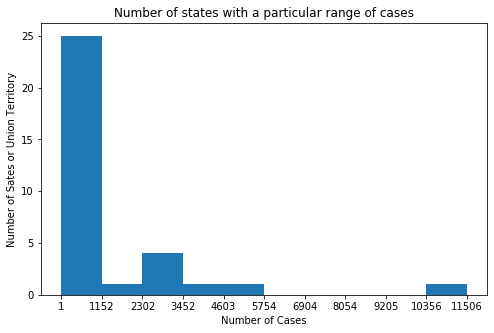

In [42]:
count, bin_edges = np.histogram(final_df['Confirmed_Cases'])

final_df['Confirmed_Cases'].plot(kind='hist', figsize=(8, 5), xticks = bin_edges)

plt.title('Number of states with a particular range of cases') # add a title to the histogram
plt.ylabel('Number of Sates or Union Territory') # add y-label
plt.xlabel('Number of Cases') # add x-label

plt.show()

In the above plot, the x-axis represents the range of Confirmed Cases in intervals of 1151. The y-axis represents the number of states that contributed to the aforementioned cases.

From the plot we can conclude that almost 25 countries have cases between 1 to 1152, while only one state of India has greater than 10000 number of cases.

In [43]:
max_cases_df = final_df.sort_values(['Confirmed_Cases'], ascending = False).head(10)
max_cases_df

,Location,Latitude,Longitude,Confirmed_Cases,Cases_per_1_Million_People,Deaths
18,Maharashtra,19.7515,75.7139,11506,101,485
9,Gujarat,22.2587,71.1924,4721,75,236
7,Delhi,28.7041,77.1025,3738,197,61
17,Madhya Pradesh,22.9734,78.6569,2719,37,145
26,Rajasthan,27.0238,74.2179,2666,39,62
27,Tamil Nadu,11.1271,78.6569,2526,37,28
31,Uttar Pradesh,26.8467,80.9462,2455,12,43
1,Andhra Pradesh,15.9129,79.7400,1525,31,33
28,Telangana,18.1124,79.0193,1057,30,26
32,West Bengal,22.9868,87.8550,795,9,33


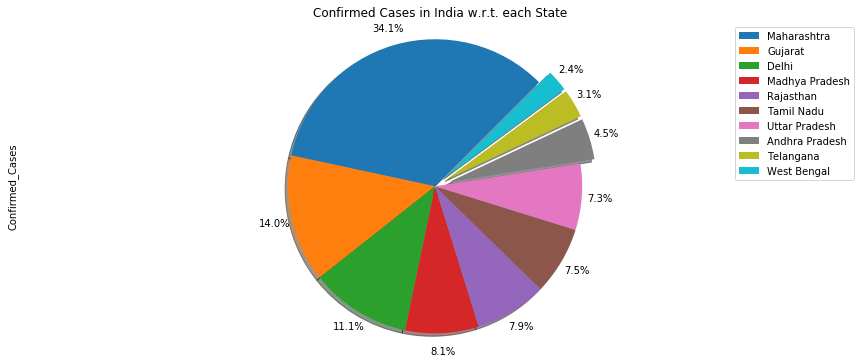

In [44]:
explode_list = [0, 0, 0, 0, 0, 0, 0, 0.1, 0.1, 0.1]
max_cases_df['Confirmed_Cases'].plot(
                            kind = 'pie',
                            figsize = (15, 6),
                            autopct = '%1.1f%%', 
                            startangle = 45,    
                            shadow = True,       
                            labels = None,         # turn off labels on pie chart
                            pctdistance = 1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            explode = explode_list
                            )

plt.title('Confirmed Cases in India w.r.t. each State')
plt.axis('equal')

# add legend
plt.legend(labels = max_cases_df['Location'], loc='upper right') 

plt.show()

In [45]:
# Instantiating a feature group for the cases in the dataframe.

cases = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(folium_df.Latitude, folium_df.Longitude):
    cases.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=4, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

In [46]:
# Adding Cases to the map of India
india_map.add_child(cases)

In [47]:
# Instantiating a feature group for the cases in the dataframe.
cases = folium.map.FeatureGroup()

# Looping through the cases and adding each to the cases feature group
for lat, lng, in zip(folium_df.Latitude, folium_df.Longitude):
    cases.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=2, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )
    
# Adding a pop-up text for each marker on the map
latitudes = list(folium_df.Latitude)
longitudes = list(folium_df.Longitude)
labels = list(folium_df.Confirmed_Cases)

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(india_map)    
    
# Adding Cases to the map of India
india_map.add_child(cases)

In [48]:
# create map and display it
ind_map = folium.Map(location=[20.5937, 78.9629], zoom_start=4)

# Instantiating a feature group for the deaths in the dataframe.
deaths = folium.map.FeatureGroup()

# Looping through the cases and adding each to the cases feature group
for lat, lng, in zip(folium_df.Latitude, folium_df.Longitude):
    deaths.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=2, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# Adding a pop-up text for each marker on the map
latitudes = list(folium_df.Latitude)
longitudes = list(folium_df.Longitude)
labels = list(folium_df.Deaths)

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(ind_map)    
    
# Adding Cases to the map of India
ind_map.add_child(deaths)


# show map
ind_map